Based on https://www.tensorflow.org/text/tutorials/text_classification_rnn

# Reformatting Data

See code in Sequential Classifier 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import pandas as pd
import random

In [3]:
def get_word_counts(text):
  return len(text.split())

In [4]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Twitter Classifier

info about using pandas for data input: https://www.tensorflow.org/tutorials/load_data/csv

Input Pipeline

In [6]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/twitter/train/', 
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 568 files belonging to 2 classes.
Using 455 files for training.


In [7]:
val_ds = tf.keras.utils.text_dataset_from_directory(
     '/content/drive/MyDrive/CMSC742 Project/Datasets/twitter/train/', 
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 568 files belonging to 2 classes.
Using 113 files for validation.


In [8]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/twitter/test/', 
    batch_size=batch_size)

Found 144 files belonging to 2 classes.


In [9]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [10]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'to', 'covid19', 'of', 'in', 'a', 'for',
       'has', 'i', 'coronavirus', 'pandemic', 'are', 'this', 'is', 'we',
       'us', 'all'], dtype='<U19')

In [11]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [13]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_ds, epochs=30,
                    validation_data=val_ds)

Epoch 1/30
8/8 [==============================] - 1s 122ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0298 - val_accuracy: 0.9912
Epoch 2/30
8/8 [==============================] - 1s 141ms/step - loss: 0.0183 - accuracy: 0.9934 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 3/30
8/8 [==============================] - 2s 139ms/step - loss: 0.0172 - accuracy: 0.9934 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 4/30
8/8 [==============================] - 2s 220ms/step - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 5/30
8/8 [==============================] - 2s 221ms/step - loss: 0.0152 - accuracy: 0.9934 - val_loss: 0.0330 - val_accuracy: 0.9912
Epoch 6/30
8/8 [==============================] - 1s 139ms/step - loss: 0.0144 - accuracy: 0.9934 - val_loss: 0.0323 - val_accuracy: 0.9912
Epoch 7/30
8/8 [==============================] - 1s 143ms/step - loss: 0.0137 - accuracy: 0.9934 - val_loss: 0.0339 - val_accuracy: 0.9912
Epoch 8/30
8/8 [====

In [18]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 22ms/step - loss: 0.2139 - accuracy: 0.9514
Test Loss: 0.21393680572509766
Test Accuracy: 0.9513888955116272


(0.0, 0.06586282455828041)

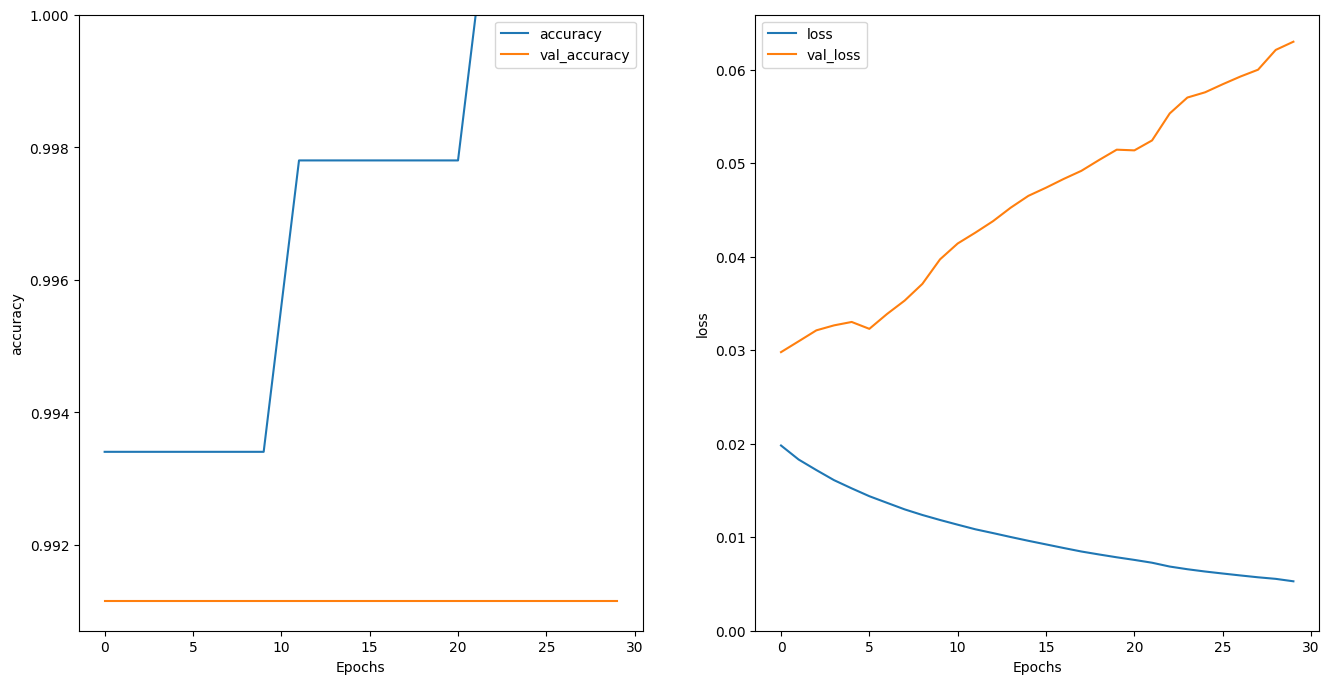

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Reddit Classifier

Input Pipeline

In [29]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/reddit/train/', 
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed=seed)

Found 612 files belonging to 2 classes.
Using 490 files for training.


In [30]:
val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/reddit/train/', 
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'validation',
    seed=seed)

Found 612 files belonging to 2 classes.
Using 122 files for validation.


In [31]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/reddit/test/', 
    batch_size=batch_size)

Found 154 files belonging to 2 classes.


In [32]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [33]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'and', 'a', 'i', 'of', 'it', 'that',
       'you', 'is', 'in', 'for', 'was', 'im', 'its', 'with', 'but', 'be'],
      dtype='<U13')

In [34]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [35]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [36]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [37]:
history = model.fit(train_ds, epochs=30,
                    validation_data=val_ds)

Epoch 1/30
8/8 [==============================] - 17s 813ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6928 - val_accuracy: 0.5082
Epoch 2/30
8/8 [==============================] - 3s 365ms/step - loss: 0.6924 - accuracy: 0.4980 - val_loss: 0.6920 - val_accuracy: 0.5082
Epoch 3/30
8/8 [==============================] - 3s 336ms/step - loss: 0.6915 - accuracy: 0.4980 - val_loss: 0.6913 - val_accuracy: 0.5082
Epoch 4/30
8/8 [==============================] - 3s 321ms/step - loss: 0.6906 - accuracy: 0.4980 - val_loss: 0.6905 - val_accuracy: 0.5082
Epoch 5/30
8/8 [==============================] - 4s 427ms/step - loss: 0.6895 - accuracy: 0.4980 - val_loss: 0.6895 - val_accuracy: 0.5082
Epoch 6/30
8/8 [==============================] - 4s 444ms/step - loss: 0.6881 - accuracy: 0.4980 - val_loss: 0.6882 - val_accuracy: 0.5082
Epoch 7/30
8/8 [==============================] - 3s 326ms/step - loss: 0.6863 - accuracy: 0.4980 - val_loss: 0.6866 - val_accuracy: 0.5082
Epoch 8/30
8/8 [===

In [38]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 40s 141ms/step - loss: 0.3266 - accuracy: 0.8571
Test Loss: 0.3266162574291229
Test Accuracy: 0.8571428656578064


(0.0, 0.7224212352186441)

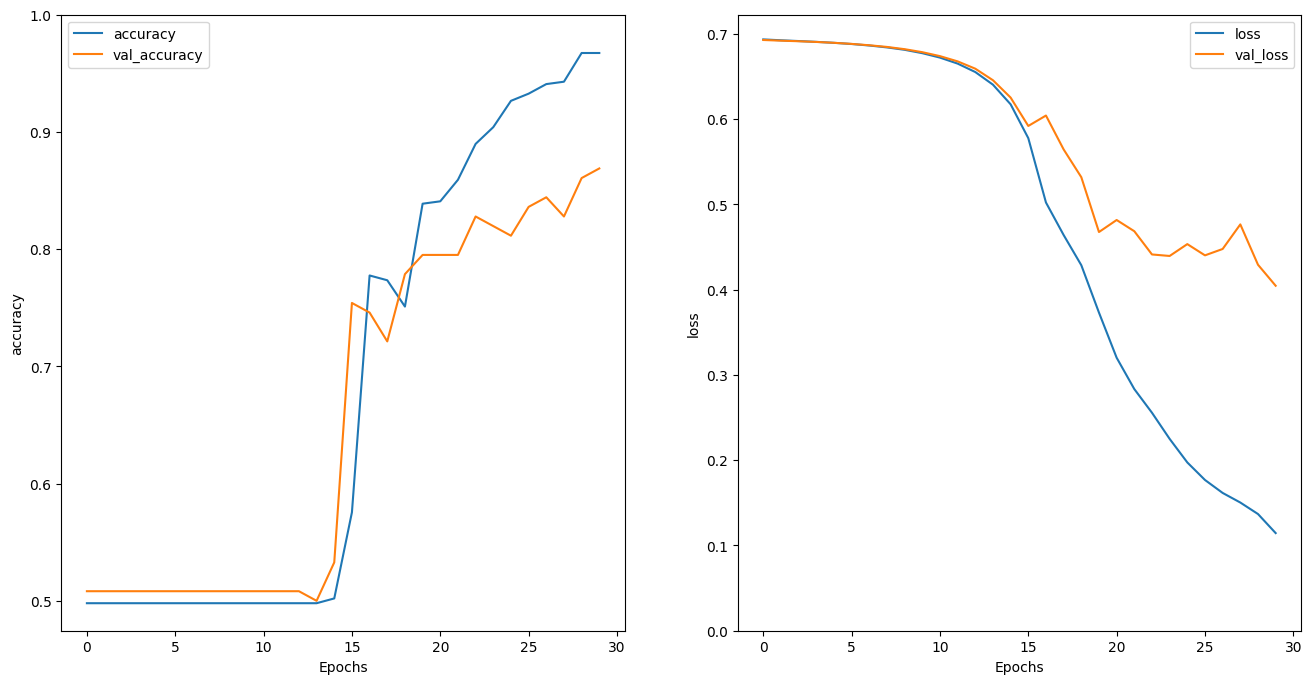

In [39]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Abstract Classifier

Input Pipeline

In [41]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/abstracts/train/', 
    batch_size=batch_size,
    validation_split = 0.2,
    subset='training',
    seed=seed)

Found 1206 files belonging to 2 classes.
Using 965 files for training.


In [42]:
val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/abstracts/train/', 
    batch_size=batch_size,
    validation_split = 0.2,
    subset='validation',
    seed=seed)

Found 1206 files belonging to 2 classes.
Using 241 files for validation.


In [43]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/abstracts/test/', 
    batch_size=batch_size)

Found 302 files belonging to 2 classes.


In [44]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [45]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'of', 'and', 'a', 'to', 'in', 'for', 'is',
       'we', 'that', 'this', 'on', 'paper', 'with', 'learning',
       'proposed', 'approach', 'as'], dtype='<U15')

In [46]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [47]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [48]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [49]:
history = model.fit(train_ds, epochs=30,
                    validation_data=val_ds)

Epoch 1/30
16/16 [==============================] - 111s 7s/step - loss: 0.6895 - accuracy: 0.5098 - val_loss: 0.6868 - val_accuracy: 0.4606
Epoch 2/30
16/16 [==============================] - 10s 588ms/step - loss: 0.6831 - accuracy: 0.5098 - val_loss: 0.6807 - val_accuracy: 0.4606
Epoch 3/30
16/16 [==============================] - 12s 664ms/step - loss: 0.6757 - accuracy: 0.5098 - val_loss: 0.6726 - val_accuracy: 0.4606
Epoch 4/30
16/16 [==============================] - 13s 766ms/step - loss: 0.6658 - accuracy: 0.5098 - val_loss: 0.6611 - val_accuracy: 0.4606
Epoch 5/30
16/16 [==============================] - 10s 604ms/step - loss: 0.6510 - accuracy: 0.5098 - val_loss: 0.6430 - val_accuracy: 0.4606
Epoch 6/30
16/16 [==============================] - 11s 634ms/step - loss: 0.6282 - accuracy: 0.5098 - val_loss: 0.6141 - val_accuracy: 0.4606
Epoch 7/30
16/16 [==============================] - 12s 752ms/step - loss: 0.5910 - accuracy: 0.5098 - val_loss: 0.5615 - val_accuracy: 0.4896
E

In [50]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

5/5 [==============================] - 74s 143ms/step - loss: 0.0661 - accuracy: 0.9801
Test Loss: 0.0661061555147171
Test Accuracy: 0.9801324605941772


(0.0, 0.7233563384041191)

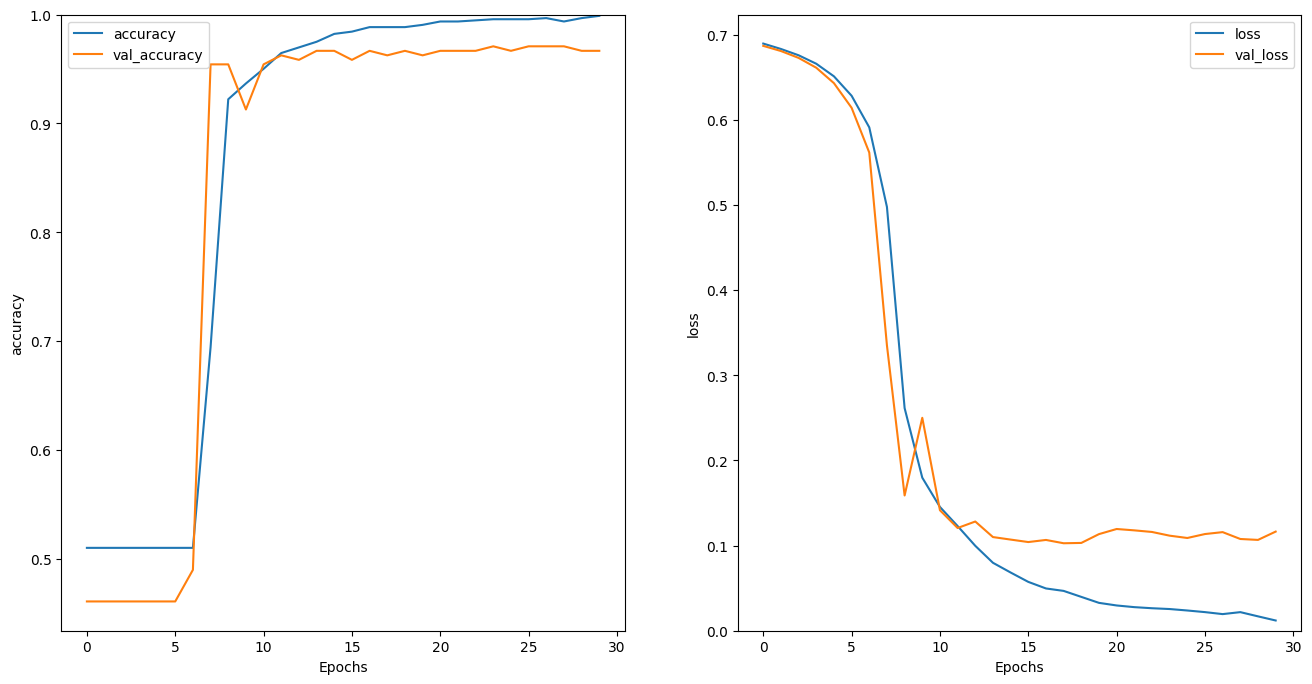

In [51]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Essay Classifier

Input Pipeline

In [52]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/essays/train/', 
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 202 files belonging to 2 classes.
Using 162 files for training.


In [53]:
val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/essays/train/', 
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 202 files belonging to 2 classes.
Using 40 files for validation.


In [54]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/essays/test/', 
    batch_size=batch_size)

Found 50 files belonging to 2 classes.


In [55]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [56]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'to', 'of', 'a', 'in', 'is', 'that',
       'for', 'i', 'can', 'it', 'be', 'are', 'have', 'on', 'with',
       'people'], dtype='<U16')

In [57]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [58]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [59]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [60]:
history = model.fit(train_ds, epochs=30,
                    validation_data=val_ds)

Epoch 1/30
3/3 [==============================] - 27s 8s/step - loss: 0.6933 - accuracy: 0.5123 - val_loss: 0.6925 - val_accuracy: 0.4500
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 0.6925 - accuracy: 0.5123 - val_loss: 0.6923 - val_accuracy: 0.4500
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 0.6919 - accuracy: 0.5123 - val_loss: 0.6921 - val_accuracy: 0.4500
Epoch 4/30
3/3 [==============================] - 5s 1s/step - loss: 0.6913 - accuracy: 0.5123 - val_loss: 0.6920 - val_accuracy: 0.4500
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 0.6907 - accuracy: 0.5123 - val_loss: 0.6918 - val_accuracy: 0.4500
Epoch 6/30
3/3 [==============================] - 4s 2s/step - loss: 0.6902 - accuracy: 0.5123 - val_loss: 0.6916 - val_accuracy: 0.4500
Epoch 7/30
3/3 [==============================] - 5s 1s/step - loss: 0.6895 - accuracy: 0.5123 - val_loss: 0.6914 - val_accuracy: 0.4500
Epoch 8/30
3/3 [========================

In [61]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1/1 [==============================] - 12s 12s/step - loss: 0.6662 - accuracy: 0.5000
Test Loss: 0.6661981344223022
Test Accuracy: 0.5


(0.0, 0.6958003729581833)

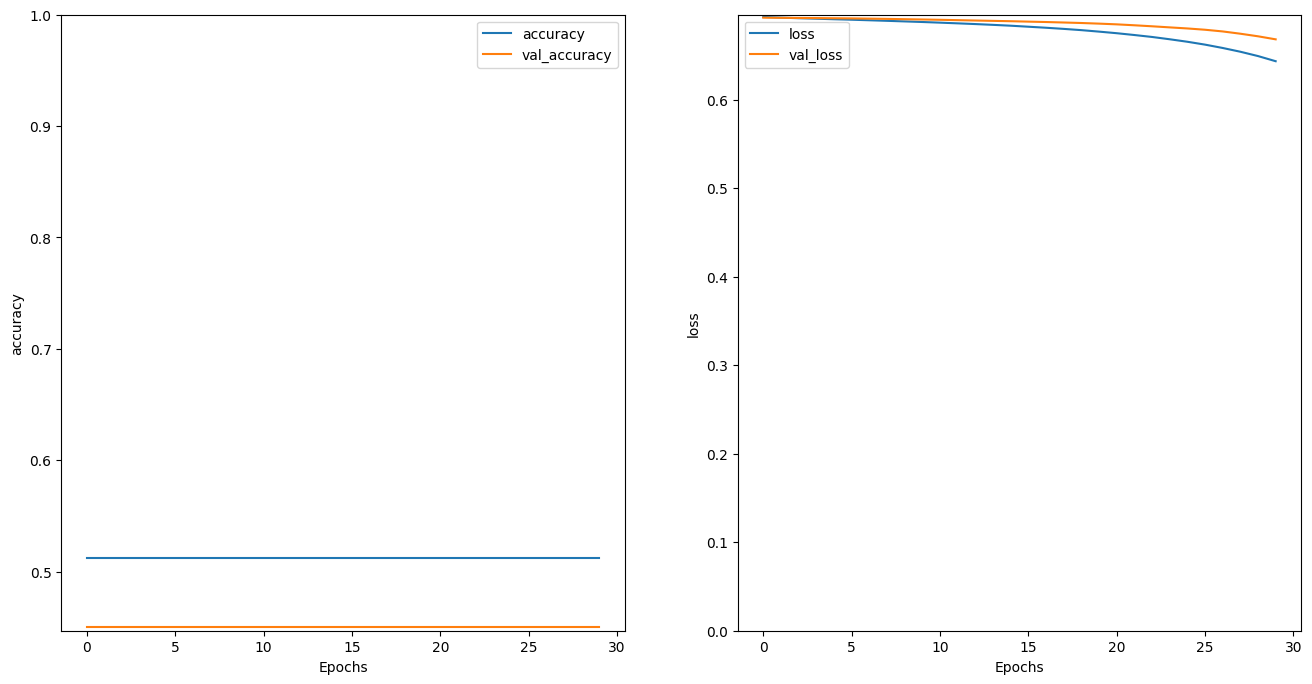

In [62]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)